# Korpus normalisieren / ausbalancieren

In [1]:
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import glob
import math
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [2]:
# großes DF einlesen 

df_bigger = pd.read_csv('Korpus/corpus_complete.csv', sep=',', encoding='utf-8')

In [3]:
df_bigger.head()

,doc,source,author,title,year,period,text_type,text,words
0,Poesia.IV.1.Testo.txt,MIDIA,Giuseppe Paolucci (Alessi Cillenio),Poesie,1700.0,1700-1750,poesia,IV. 1. Rime degli Arcadi: Alessi Cillenio (Giu...,10862.0
1,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0
2,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0
4,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0


In [4]:
df_bigger.shape

(243537, 9)

## Normalisierung

In [346]:
# Normalisierung durch zufälliges Ziehen ohne Zurücklegen von Samples (Texten)
# künstliches Vergrößern der kleinen Zeiträume durch Reduplizierung
# Samplegröße individuell festgegelegt durch Ausprobieren 
# Ziel: ungefähres Übereinstimmen der Tokenanzahl (ca. 3 Mio)

p1 = df_bigger[df_bigger['period']=='1700-1750']
p111 = df_bigger[df_bigger['period']=='1700-1750'].sample(n=2400 , random_state=1)
p2 = df_bigger[df_bigger['period']=='1751-1800']
p22 = df_bigger[df_bigger['period']=='1751-1800'].sample(n=420 , random_state=1)
p3 = df_bigger[df_bigger['period']=='1801-1825']
p33 = df_bigger[df_bigger['period']=='1801-1825'].sample(n=350 , random_state=1)
p4 = df_bigger[df_bigger['period']=='1826-1850']
p44 = df_bigger[df_bigger['period']=='1826-1850'].sample(n=750 , random_state=1)
p5 = df_bigger[df_bigger['period']=='1851-1875'].sample(n=6250 , random_state=1)     # random_state für Reproduzierbarkeit
p6 = df_bigger[df_bigger['period']=='1876-1900'].sample(n=12300 , random_state=1)
p7 = df_bigger[df_bigger['period']=='1901-1925']
p77 = df_bigger[df_bigger['period']=='1901-1925'].sample(n=1000 , random_state=1)
p8 = df_bigger[df_bigger['period']=='1926-1950']
p88 = df_bigger[df_bigger['period']=='1926-1950'].sample(n=3600 , random_state=1)
p9 = df_bigger[df_bigger['period']=='1951-1975']
p99 = df_bigger[df_bigger['period']=='1951-1975'].sample(n=915 , random_state=1)
p10 = df_bigger[df_bigger['period']=='1976-2000'].sample(n=43600 , random_state=1)
p11 = df_bigger[df_bigger['period']=='2001-2021']    

# Zusammenfügen der Zeiträume und Samples zu einem neuen Dataframe
df_norm = pd.concat([p1, p111, p2, p22, p3, p33, p4, p44, p5, p6, p7, p77, p8, p88, p9, p99, p10, p11])

In [347]:
df_norm.head()

,doc,source,author,title,year,period,text_type,text,words
0,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0
1,Poesia.IV.11.Testo.txt,MIDIA,Giambattista Felice Zappi,Poesie,1700.0,1700-1750,poesia,IV. 11. Rime degli arcadi: Tirsi Leucasio (Gio...,6113.0
2,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0
3,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0
4,Poesia.IV.4.Testo.txt,MIDIA,Faustina Maratti Zappi,Poesie,1700.0,1700-1750,poesia,IV. 4. Rime degli Arcadi: Aglauro Cidonia (Fau...,3184.0


In [348]:
df_norm.shape

(239270, 9)

### Anzahl der Texte pro Zeitraum

In [349]:
periods_norm = list(df_norm['period'].unique())
per_len_norm ={i: len(df_norm[df_norm['period']==i]) for i in periods_norm }
per_len_norm

{'1700-1750': 9075,
 '1751-1800': 2275,
 '1801-1825': 1142,
 '1826-1850': 5287,
 '1851-1875': 6250,
 '1876-1900': 12300,
 '1901-1925': 24826,
 '1926-1950': 13859,
 '1951-1975': 2270,
 '1976-2000': 43600,
 '2001-2021': 118386}

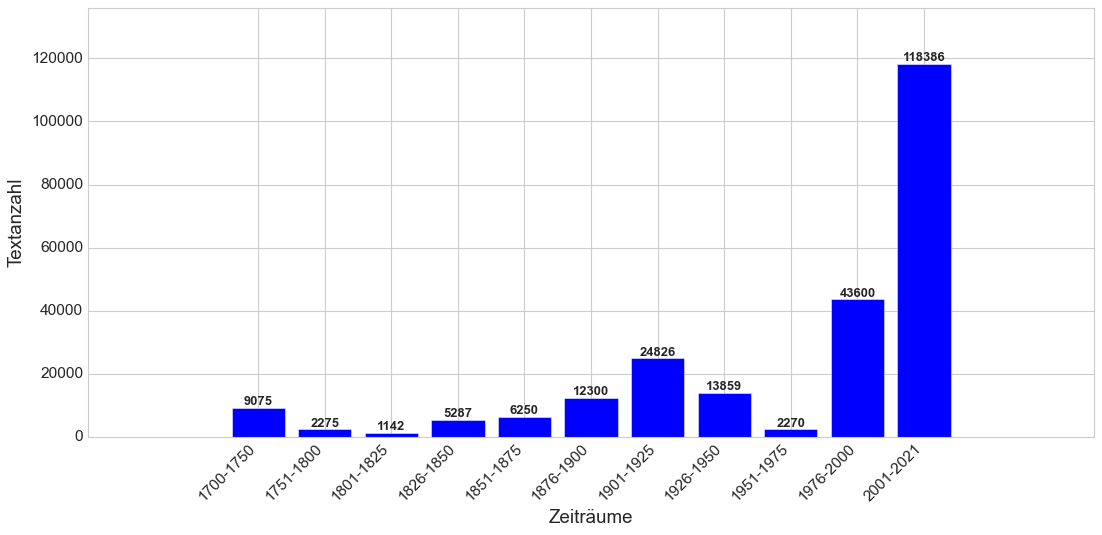

In [355]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(periods_norm))
plt.bar(x_indexes, per_len_norm.values(), label='Textanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = per_len_norm.keys(), rotation=45, horizontalalignment='right')
plt.xlabel('Zeiträume')
plt.ylabel('Textanzahl')

#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, per_len_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusnorm_textanzahl.png')
plt.show()

### Anzahl der Tokens pro Zeitraum

In [356]:
sum_words_norm = {i: math.trunc(sum(df_norm[df_norm['period']==i].words)) for i in periods_norm}
sum_words_norm

{'1700-1750': 3069490,
 '1751-1800': 3067460,
 '1801-1825': 3097784,
 '1826-1850': 3010878,
 '1851-1875': 3014693,
 '1876-1900': 3011474,
 '1901-1925': 3018997,
 '1926-1950': 3099498,
 '1951-1975': 3073614,
 '1976-2000': 3009589,
 '2001-2021': 3026928}

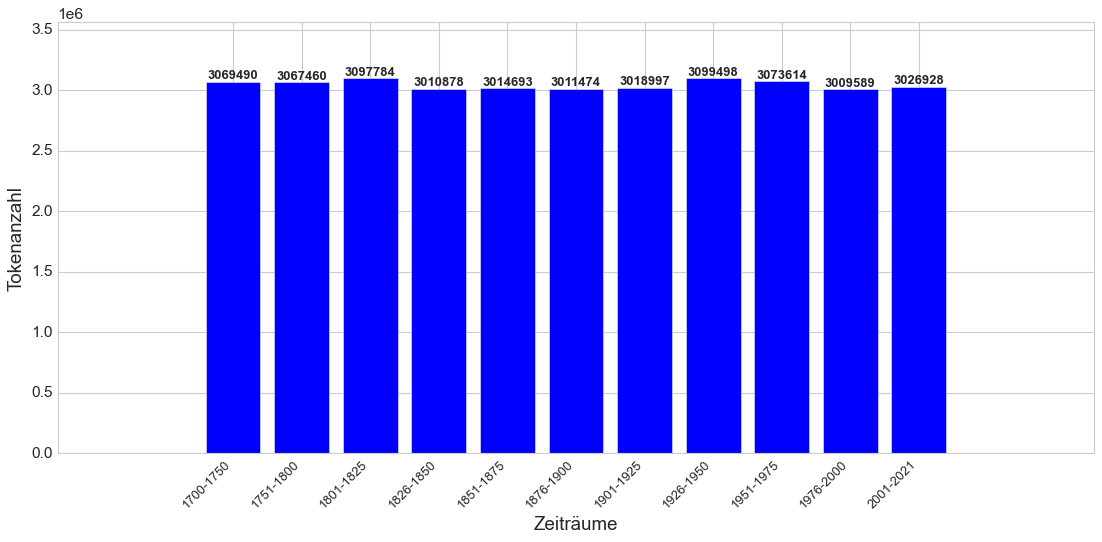

In [357]:
plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

x_indexes = np.arange(len(sum_words_norm))
plt.bar(x_indexes, sum_words_norm.values(), label='Tokenanzahl', width=0.8, color='b')
plt.xticks(ticks = x_indexes, labels = sum_words_norm.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.margins(0.2, 0.15)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')
        
#plt.savefig('Plots/corpusnorm_tokenanzahl.png')
plt.show()

### Verteilung der Texttypen auf die Zeiträume

In [358]:
period_frames = []

In [359]:
# Teilframes pro Zeitraum erstellen

df_periods = dict(tuple(df_norm.groupby(by='period')))

for df, period in zip(df_periods, periods_norm):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [360]:
periods_texttypes = {}

In [361]:
# Anzahl der Texte pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    texttypes = df.groupby(by='text_type')
    types = texttypes.groups
    
    periods_texttypes[period] = {key : len(value) for key, value in types.items()}

In [362]:
periods_texttypes

{'1700-1750': {'espositivo': 20,
  'personale': 27,
  'poesia': 17,
  'prosa letteraria': 8978,
  'teatro': 33},
 '1751-1800': {'espositivo': 39,
  'personale': 22,
  'poesia': 26,
  'prosa letteraria': 2133,
  'teatro': 55},
 '1801-1825': {'espositivo': 78,
  'personale': 37,
  'poesia': 51,
  'prosa letteraria': 966,
  'teatro': 10},
 '1826-1850': {'espositivo': 38,
  'personale': 15,
  'poesia': 13,
  'prosa letteraria': 5213,
  'teatro': 8},
 '1851-1875': {'espositivo': 17,
  'personale': 6,
  'poesia': 5,
  'prosa letteraria': 6219,
  'stampa': 1,
  'teatro': 2},
 '1876-1900': {'espositivo': 17,
  'personale': 5,
  'poesia': 13,
  'prosa letteraria': 12246,
  'stampa': 10,
  'teatro': 9},
 '1901-1925': {'espositivo': 27,
  'personale': 6,
  'poesia': 14,
  'prosa letteraria': 24754,
  'stampa': 17,
  'teatro': 8},
 '1926-1950': {'espositivo': 46,
  'personale': 10,
  'poesia': 3,
  'prosa letteraria': 13731,
  'stampa': 61,
  'teatro': 8},
 '1951-1975': {'dialogo': 6,
  'espositiv

In [363]:
periods_texttypes_token = {}

In [364]:
# Anzahl der Tokens pro Texttyp pro Zeitraum

for df, period in zip(period_frames, periods_norm):
    words = {i: math.trunc(sum(df[df['text_type']==i].words)) for i in list(df['text_type'].unique())}
    periods_texttypes_token[period] = words

In [365]:
periods_texttypes_token

{'1700-1750': {'espositivo': 1198513,
  'poesia': 746446,
  'personale': 327615,
  'prosa letteraria': 449068,
  'teatro': 347848},
 '1751-1800': {'personale': 460341,
  'espositivo': 1580595,
  'teatro': 568642,
  'poesia': 249038,
  'prosa letteraria': 208844},
 '1801-1825': {'personale': 1561887,
  'espositivo': 931597,
  'poesia': 275991,
  'prosa letteraria': 230771,
  'teatro': 97538},
 '1826-1850': {'poesia': 276842,
  'teatro': 58634,
  'personale': 345585,
  'espositivo': 1478522,
  'prosa letteraria': 851295},
 '1851-1875': {'prosa letteraria': 1545138,
  'teatro': 15244,
  'espositivo': 860532,
  'personale': 542414,
  'poesia': 51218,
  'stampa': 147},
 '1876-1900': {'teatro': 75046,
  'prosa letteraria': 2191673,
  'stampa': 7480,
  'espositivo': 587961,
  'personale': 38992,
  'poesia': 110322},
 '1901-1925': {'prosa letteraria': 2255396,
  'espositivo': 431992,
  'poesia': 146963,
  'personale': 114027,
  'teatro': 68063,
  'stampa': 2556},
 '1926-1950': {'prosa letterar

In [366]:
espositivo = []
dialogo = []
poesia = []
personale = []
prosa_lett = []
stampa = []
teatro = []
web = []

In [367]:
# Werte des Texttyps rausziehen und in Liste speichern 

for i in periods_texttypes_token:
    
    esp = periods_texttypes_token.get(i, {}).get('espositivo')
    espositivo.append(esp)
    
    di = periods_texttypes_token.get(i, {}).get('dialogo')
    dialogo.append(di)
    
    po = periods_texttypes_token.get(i, {}).get('poesia')
    poesia.append(po)
    
    per = periods_texttypes_token.get(i, {}).get('personale')
    personale.append(per)
    
    prolet = periods_texttypes_token.get(i, {}).get('prosa letteraria')
    prosa_lett.append(prolet)
    
    st = periods_texttypes_token.get(i, {}).get('stampa')
    stampa.append(st)
    
    tea = periods_texttypes_token.get(i, {}).get('teatro')
    teatro.append(tea)
    
    w = periods_texttypes_token.get(i, {}).get('web')
    web.append(w)

In [368]:
# None mit 0 ersetzen

espositivo = [0 if v is None else v for v in espositivo]
dialogo = [0 if v is None else v for v in dialogo]
poesia = [0 if v is None else v for v in poesia]
personale = [0 if v is None else v for v in personale]
prosa_lett = [0 if v is None else v for v in prosa_lett]
stampa = [0 if v is None else v for v in stampa]
teatro = [0 if v is None else v for v in teatro]
web = [0 if v is None else v for v in web]

In [369]:
print(espositivo)
print(dialogo)
print(personale)
print(poesia)
print(prosa_lett)
print(stampa)
print(teatro)
print(web)

[1198513, 1580595, 931597, 1478522, 860532, 587961, 431992, 1024697, 169521, 6657, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 23349, 21, 3783]
[327615, 460341, 1561887, 345585, 542414, 38992, 114027, 412463, 0, 0, 0]
[746446, 249038, 275991, 276842, 51218, 110322, 146963, 12347, 0, 0, 0]
[449068, 208844, 230771, 851295, 1545138, 2191673, 2255396, 1569490, 1546181, 95652, 247200]
[0, 0, 0, 0, 147, 7480, 2556, 34409, 1334563, 2907259, 2049578]
[347848, 568642, 97538, 58634, 15244, 75046, 68063, 46092, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 726367]


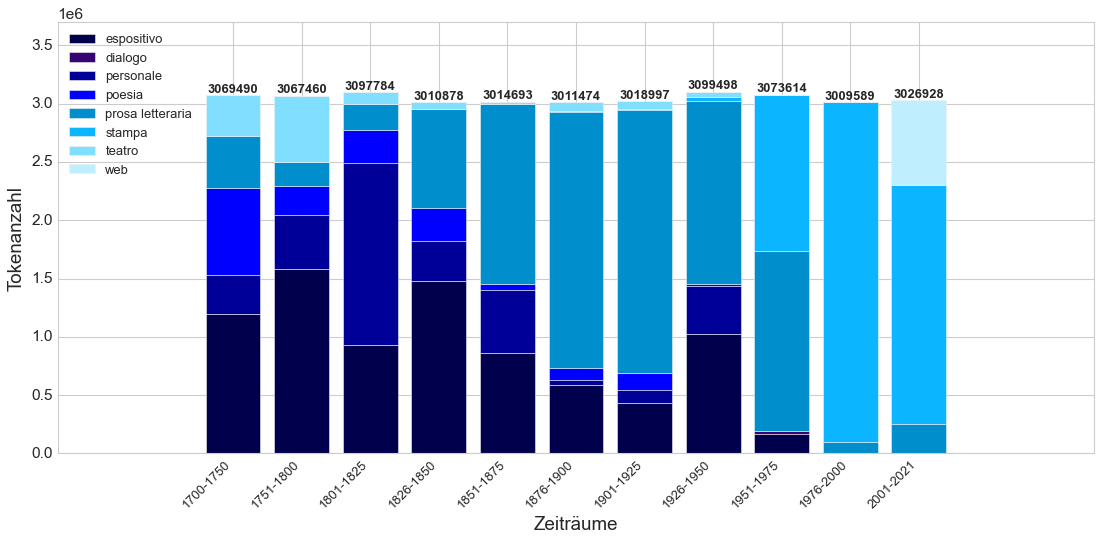

In [372]:
# Verteilung der Texttypen auf die Zeiträume

plt.figure(figsize=[14,7])
plt.style.use('seaborn-whitegrid')

data = np.array([espositivo, dialogo, personale, poesia, prosa_lett, stampa, teatro, web])
labels = ['espositivo', 'dialogo', 'personale', 'poesia', 'prosa letteraria', 'stampa', 'teatro', 'web']
colors = ['#00004d','#380474', '#000099', '#0000FF', '#008fcc', '#0BB5FF', '#80dfff', '#BFEFFF']

X = np.arange(data.shape[1])
for i in range(data.shape[0]):
    plt.bar(X, data[i],bottom = np.sum(data[:i], axis=0),label=labels[i % len(labels)], color=colors[i % len(colors)])

x_indexes = np.arange(len(periods_norm))
plt.xticks(ticks=x_indexes, labels=periods_norm, rotation=45, horizontalalignment='right', fontsize='small')
plt.xlabel('Zeiträume')
plt.ylabel('Tokenanzahl')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 3700000)
plt.legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.margins(0.2, 0.2)

for i, j in zip(x_indexes, sum_words_norm.values()):
       plt.annotate(j, xy=(i,j), xycoords='data', verticalalignment='bottom', horizontalalignment='center', 
                    fontweight='demi', fontsize='small')

#plt.savefig('Plots/corpusnorm_tokenanzahl_texttypes.png')
plt.show()

In [373]:
# normalisiertes Korpus speichern

df_norm.to_csv('Korpus/corpus_norm.csv', encoding='utf-8', index=False)

### Kandidaten im normalisierten, lemmatisierten Korpus

In [2]:
# wieder einlesen 

df = pd.read_csv('Korpus/corpus_complete.csv', sep=',', encoding='utf-8') # norm

In [3]:
df.head()

,doc,source,author,title,year,period,text_type,text,words
0,Poesia.IV.11.Testo.txt,MIDIA,Giambattista Felice Zappi,Poesie,1700.0,1700-1750,poesia,IV. 11. Rime degli arcadi: Tirsi Leucasio (Gio...,6113.0
1,Personali.IV.5.Testo.txt,MIDIA,Lorenzo Magalotti,Lettere odorose (1693-1705),1700.0,1700-1750,personale,"IV. 5. Lorenzo Magalotti, Lettere odorose (169...",8374.0
2,Espositivi.IV.4.Testo.txt,MIDIA,Ludovico Antonio Muratori,Antichità italiane,1700.0,1700-1750,espositivo,"﻿IV. 4. Ludovico Antonio Muratori, Antichità i...",8990.0
3,Personali.IV.15.Testo.txt,MIDIA,Pietro Giannone,Vita scritta da lui medesimo,1700.0,1700-1750,personale,[Proemio]\nPrendo a scrivere la mia vita e qua...,10118.0
4,Personali.IV.4.Testo.txt,MIDIA,Vincenzo da Filicaia,Lettere inedite a Lorenzo Magalotti,1700.0,1700-1750,personale,"IV. 4. Vincenzo da Filicaia, Lettere inedite a...",10073.0


In [4]:
df.shape

(305285, 9)

In [5]:
df.text = df.text.fillna('')

In [6]:
# Teilframes pro Zeitraum erstellen

period_frames = []
periods = list(df['period'].unique())
df_periods = dict(tuple(df.groupby(by='period')))

for df, period in zip(df_periods, periods):
    df_period = df_periods[period]
    period_frames.append(df_period)

In [7]:
# Funktion, die bestimmte Wörter zählt
# Achtung: noch nicht lemmatisiert! Nach Lemmatisierung wiederholen!

def count_keywords(df, keywords):
    keyword_dict = {w:w.replace(' ', '_') for w in keywords}

    corpus = ' '.join(df.text).lower()                     
    for w,w2 in keyword_dict.items():
        corpus = corpus.replace(w,w2)

    all_counts = Counter(corpus.split())
    final_counts = {w:all_counts[w2] for w,w2 in keyword_dict.items()}
    return final_counts

In [8]:
# mögliche Kandidaten

keywords = ['atrocemente', 'formidabilmente', 'mostruosamente', 'orrendamente', 
            'orribilmente', 'spaventosamente', 'terribilmente', 'tremendamente', 
            'molto', 'angoscia', 'angosciare', 'ansia', 'atterrire', 'panico', 
            'paura', 'raccapricciare', 'raccapriccio', 'schifo', 'sgomentare', 
            'sgomento', 'spaventare', 'spavento', 'terrore', 'domani', 'finora', 
            'ieri', 'oggi', 'presto', 'raramente', 'sempre', 'spesso']

In [9]:
candidates = {}

for df, period in zip(period_frames, periods):
    res = count_keywords(df, keywords)
    candidates[period] = res

In [10]:
candidates

{'1700-1750': {'atrocemente': 2,
  'formidabilmente': 0,
  'mostruosamente': 2,
  'orrendamente': 1,
  'orribilmente': 19,
  'spaventosamente': 9,
  'terribilmente': 13,
  'tremendamente': 0,
  'molto': 1303,
  'angoscia': 3,
  'angosciare': 0,
  'ansia': 0,
  'atterrire': 13,
  'panico': 9,
  'paura': 108,
  'raccapricciare': 0,
  'raccapriccio': 1,
  'schifo': 7,
  'sgomentare': 0,
  'sgomento': 3,
  'spaventare': 4,
  'spavento': 148,
  'terrore': 107,
  'domani': 25,
  'finora': 224,
  'ieri': 13,
  'oggi': 479,
  'presto': 187,
  'raramente': 8,
  'sempre': 1887,
  'spesso': 431},
 '1751-1800': {'atrocemente': 3,
  'formidabilmente': 0,
  'mostruosamente': 0,
  'orrendamente': 1,
  'orribilmente': 18,
  'spaventosamente': 0,
  'terribilmente': 12,
  'tremendamente': 0,
  'molto': 1705,
  'angoscia': 17,
  'angosciare': 0,
  'ansia': 0,
  'atterrire': 7,
  'panico': 10,
  'paura': 123,
  'raccapricciare': 0,
  'raccapriccio': 7,
  'schifo': 26,
  'sgomentare': 1,
  'sgomento': 3,
 

In [11]:
table = pd.DataFrame.from_dict(candidates, orient='index')
table

,atrocemente,formidabilmente,mostruosamente,orrendamente,orribilmente,spaventosamente,terribilmente,tremendamente,molto,angoscia,...,spavento,terrore,domani,finora,ieri,oggi,presto,raramente,sempre,spesso
1700-1750,2,0,2,1,19,9,13,0,1303,3,...,148,107,25,224,13,479,187,8,1887,431
1751-1800,3,0,0,1,18,0,12,0,1705,17,...,71,91,127,187,72,457,394,79,2759,689
1801-1825,2,0,2,9,25,2,9,2,1235,12,...,53,92,196,74,295,1014,346,20,2742,539
1826-1850,18,0,0,4,43,1,31,0,1326,46,...,198,216,98,135,91,549,387,21,2425,508
1851-1875,60,6,20,22,184,23,113,54,3535,205,...,351,403,676,341,441,1497,1130,109,6709,1230
1876-1900,80,15,10,42,166,39,106,42,2090,103,...,247,205,529,258,390,906,677,200,4227,829
1901-1925,77,16,39,41,150,121,227,38,1951,243,...,241,288,706,295,599,1037,669,294,3969,920
1926-1950,47,8,23,27,163,94,205,35,1458,232,...,167,277,521,198,484,1002,386,222,2702,522
1951-1985,29,2,12,25,47,41,112,29,1853,287,...,73,331,741,631,1113,1984,751,292,3294,1297
1986-2000,105,7,101,107,103,107,128,113,3169,270,...,203,320,997,880,3910,3630,920,548,4231,1366


In [386]:
table.to_csv('Korpus/candidates.csv', sep=';')